In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def spline(xs, ys, x):
    def h(i):
        if i == 0:
            i += 1
        return xs[i] - xs[i-1]
    
    def all_args(i):
        F = (ys[i+1] - ys[i])/h(i+1) - (ys[i] - ys[i-1])/h(i)
        A = h(i)/6
        B = (h(i) + h(i+1))/3
        C = h(i+1)/6
        return (A, B, C, F)
    
    def alpha(i):
        A, B, C, F = all_args(i-1)
        if i == 1:
            return -C/B
        return -C/(A*alpha(i-1) + B)
    
    def beta(i):
        A, B, C, F = all_args(i-1)
        if i == 1:
            return F/B
        return (F - A*beta(i-1))/(A*alpha(i-1) + B)
    
    def gamma(i):
        if i == 0 or i == len(xs) - 1:
            return 0
        if i == len(xs) - 2:
            A, B, C, F = all_args(i)
            return (F - A*beta(i)) / (B + A*alpha(i))
        return alpha(i+1) * gamma(i+1) + beta(i+1)
    i = 0
    vals = []
    for xi in x:
        while (i < len(xs) - 2) and not(xs[i] <= xi <= xs[i+1]):
            i += 1
        prt1 = (xs[i+1] - xi)/h(i+1)
        prt2 = (xi - xs[i])/h(i+1)
        prt3 = ((xs[i+1] - xi)**3 - h(i+1)**2 * (xs[i+1] - xi))/(6*h(i+1))
        prt4 = ((xi - xs[i])**3 - h(i+1)**2 * (xi - xs[i]))/(6*h(i+1))
        val = ys[i] * prt1 \
            + ys[i+1] * prt2 \
            + gamma(i) * prt3 \
            + gamma(i+1) * prt4
        if abs(xi - xs[i]) < 1e-7 and abs(val - ys[i]) > 1e-7:
            print(xs[i+1], xi, xs[i])
            print(prt1, prt2, prt3, prt4, val, ys[i])
        vals += [val]
    return vals

[-5 -3 -1  1  3  5]
[ 0.95892427 -0.14112001 -0.84147098  0.84147098  0.14112001 -0.95892427]


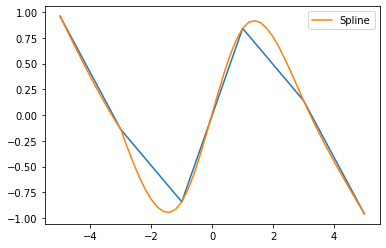

In [4]:
a, b = -5, 5
X = np.arange(a, b+2, 2)
print(X)
Y = np.sin(X) #X**3 - X**2 + 2*X + 4
print(Y)
x0 = np.arange(a, b+0.2, 0.2)
y0 = spline(X, Y, x0)
plt.plot(X, Y)
plt.plot(x0, y0, label = "Spline")
plt.legend()
plt.show()